# Mapas

In [ ]:
# 1. Para Folium
#pip install folium

# 2. Para mapas más avanzados
#pip install plotly geopandas contextily

# 3. Para datos geoespaciales
#pip install shapely fiona pyproj

# 4. Para empezar rápido
#pip install folium

# 5. Para mapas más avanzados
#pip install plotly

# 6. Para GeoPandas actualizado
#pip install geodatasets

# 7. Para todo junto
#pip install folium plotly geodatasets contextily

# 8. Geopanda
# pip install geopandas==0.14.4

# 9. Geodatasets
# pip install geodatasets

In [18]:
# 1. Folium - La más popular y fácil
import folium

# Mapa básico
m = folium.Map(location=[4.6097, -74.0817], zoom_start=10)  # Bogotá
m.save('mapa.html')
m  # En Jupyter se muestra directamente

In [21]:
## 2. Folium

import folium

# Mapa básico de Colombia
m = folium.Map(location=[4.6, -74.08], zoom_start=6)

# Agregar marcadores de ciudades principales
ciudades = {
    'Bogotá': [4.6097, -74.0817],
    'Medellín': [6.2442, -75.5812],
    'Cali': [3.4516, -76.5320],
    'Barranquilla': [10.9685, -74.7813],
    'Cartagena': [10.3910, -75.4794]
}

for ciudad, coords in ciudades.items():
    folium.Marker(
        coords,
        popup=ciudad,
        tooltip=ciudad,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

m

In [4]:
import folium

# Mapa básico de Colombia
m = folium.Map(location=[4.6, -74.08], zoom_start=6)

# Agregar marcadores de ciudades principales
ciudades = {
    'Bogotá': [4.6097, -74.0817],
    'Medellín': [6.2442, -75.5812],
    'Cali': [3.4516, -76.5320],
    'Barranquilla': [10.9685, -74.7813],
    'Cartagena': [10.3910, -75.4794],
    'Santa Marta': [11.2408, -74.2099],
    'Bucaramanga': [7.1193, -73.1227]
}

for ciudad, coords in ciudades.items():
    folium.Marker(
        coords,
        popup=ciudad,
        tooltip=ciudad,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

m

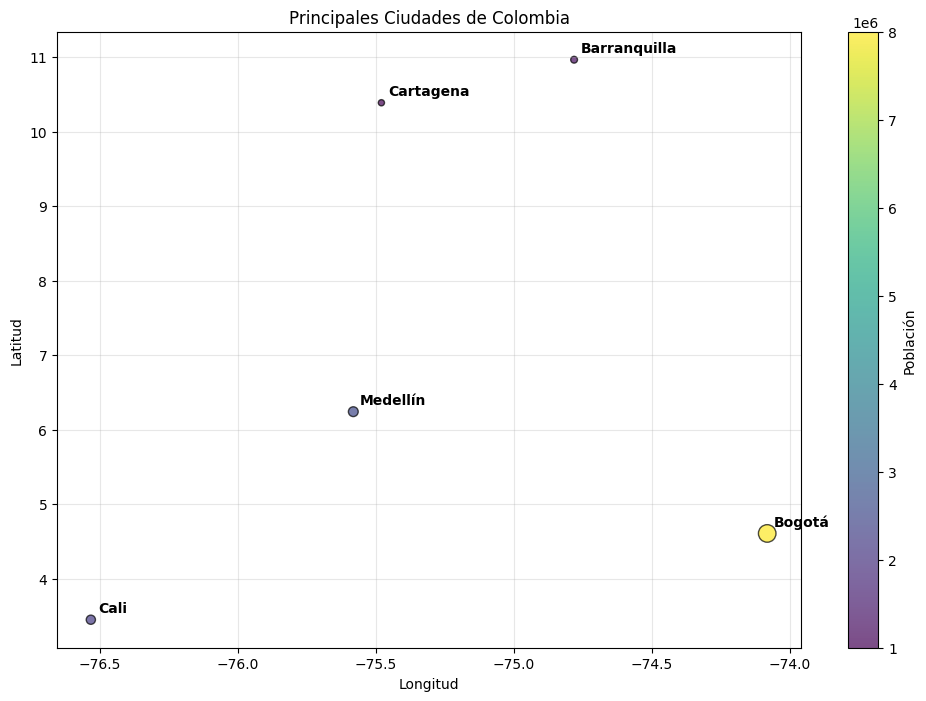

In [22]:
# 3. Con datos propios (sin datasets externos)

import matplotlib.pyplot as plt
import pandas as pd

# Crear datos de ejemplo
data = {
    'Ciudad': ['Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena'],
    'Latitud': [4.6097, 6.2442, 3.4516, 10.9685, 10.3910],
    'Longitud': [-74.0817, -75.5812, -76.5320, -74.7813, -75.4794],
    'Población': [8000000, 2500000, 2200000, 1200000, 1000000]
}

df = pd.DataFrame(data)

# Crear mapa simple
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitud'], df['Latitud'], 
                     s=df['Población']/50000,  # Tamaño proporcional
                     c=df['Población'], cmap='viridis',
                     alpha=0.7, edgecolors='black')

# Agregar nombres de ciudades
for i, ciudad in enumerate(df['Ciudad']):
    plt.annotate(ciudad, 
                (df['Longitud'][i], df['Latitud'][i]),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

plt.colorbar(scatter, label='Población')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Principales Ciudades de Colombia')
plt.grid(True, alpha=0.3)
plt.show()

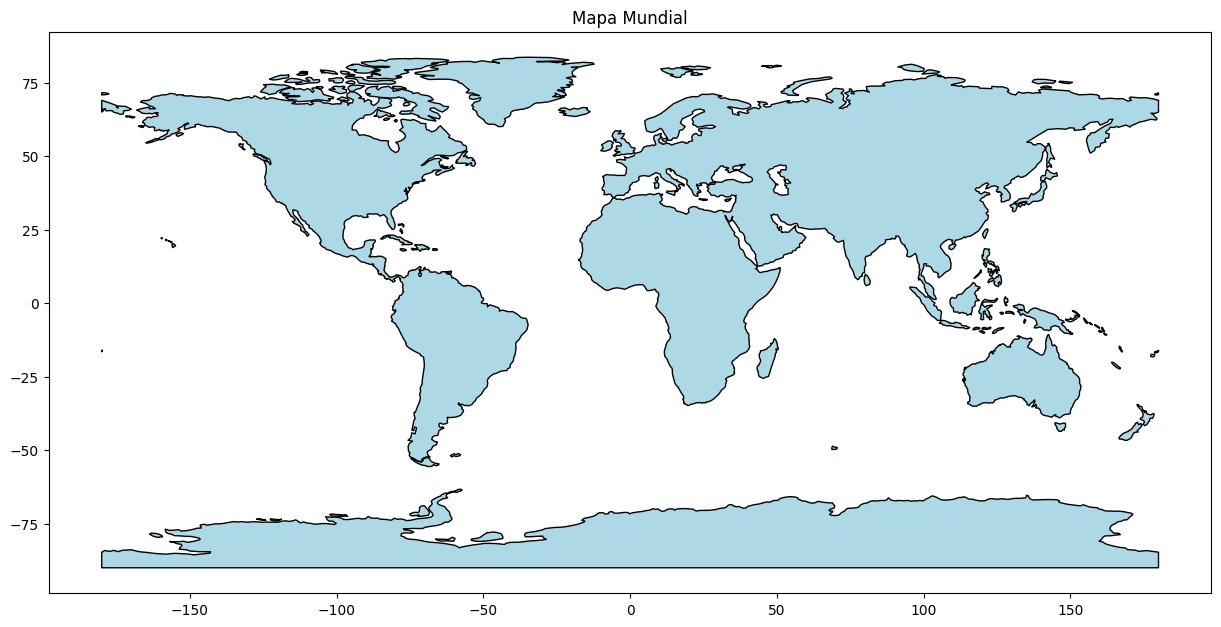

In [ ]:
# 4. GeoPandas + Matplotlib - Para datos geoespaciales

import geopandas as gpd
import matplotlib.pyplot as plt

# Instalar y usar geodatasets como reemplazo directo
try:
    import geodatasets
    world = gpd.read_file(geodatasets.get_path("naturalearth.land"))
except ImportError:
    # Si no está instalado, usar URL que funciona
    world = gpd.read_file("zip+https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip")

# Crear el mapa
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title('Mapa Mundial')
plt.show()

In [ ]:
# 5. Plotly - Mapas interactivos avanzados

import plotly.graph_objects as go
import plotly.express as px

# Mapa con marcadores
fig = go.Figure(go.Scattermapbox(
    lat=[4.6097],
    lon=[-74.0817],
    mode='markers',
    marker=dict(size=14, color='red'),
    text=['Bogotá'],
))

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(center=dict(lat=4.6097, lon=-74.0817), zoom=10),
    margin={"r":0,"t":0,"l":0,"b":0}
)
fig.show()

/var/folders/ky/w_yrzmks6yv4tnlq0djdqvyh0000gn/T/ipykernel_57119/2365380271.py:7: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [ ]:
# 6. Plotly - Mapas interactivos modernos

import plotly.express as px
import pandas as pd

# Datos de ciudades
df = pd.DataFrame({
    'Ciudad': ['Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena'],
    'lat': [4.6097, 6.2442, 3.4516, 10.9685, 10.3910],
    'lon': [-74.0817, -75.5812, -76.5320, -74.7813, -75.4794],
    'Población': [8000000, 2500000, 2200000, 1200000, 1000000]
})

# Crear mapa interactivo
fig = px.scatter_mapbox(df, 
                       lat="lat", 
                       lon="lon",
                       hover_name="Ciudad",
                       hover_data=["Población"],
                       color="Población",
                       size="Población",
                       color_continuous_scale="Viridis",
                       size_max=15,
                       zoom=5)

fig.update_layout(mapbox_style="open-street-map",
                 margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/var/folders/ky/w_yrzmks6yv4tnlq0djdqvyh0000gn/T/ipykernel_57119/2350455582.py:15: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



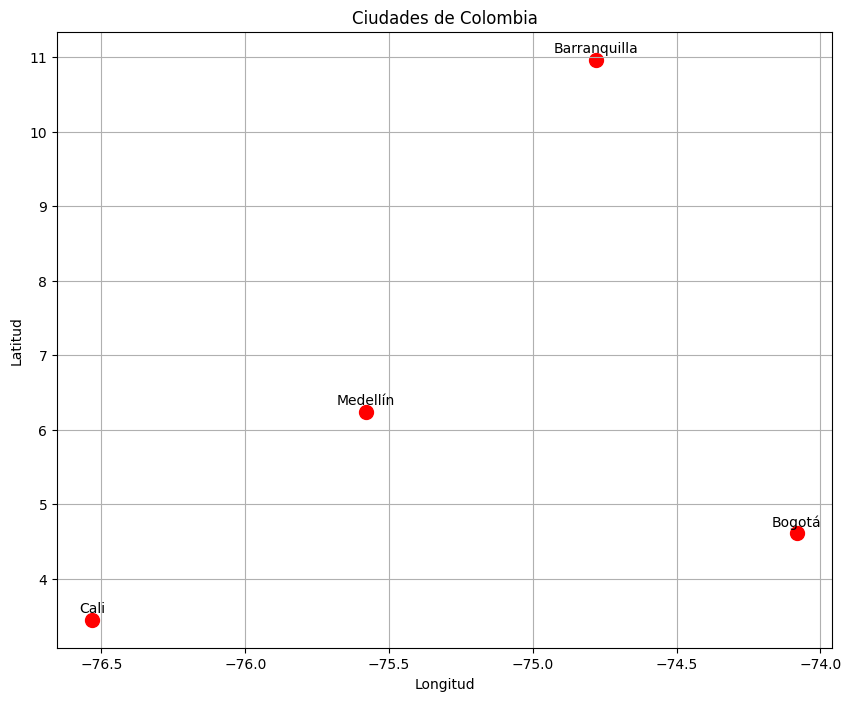

In [ ]:
# 7. Basemap con coordenadas simples

import matplotlib.pyplot as plt
import numpy as np

# Mapa simple con puntos
fig, ax = plt.subplots(figsize=(10, 8))

# Coordenadas de ciudades colombianas
ciudades = {
    'Bogotá': (4.6097, -74.0817),
    'Medellín': (6.2442, -75.5812),
    'Cali': (3.4516, -76.5320),
    'Barranquilla': (10.9685, -74.7813)
}

# Plotear ciudades
for ciudad, (lat, lon) in ciudades.items():
    plt.scatter(lon, lat, s=100, c='red')
    plt.text(lon, lat+0.1, ciudad, ha='center')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Ciudades de Colombia')
plt.grid(True)
plt.show()

In [42]:
# 8. Plotly - Mapas interactivos modernos

import plotly.express as px
import pandas as pd

# Datos de ciudades
df = pd.DataFrame({
    'Ciudad': ['Bogotá', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena'],
    'lat': [4.6097, 6.2442, 3.4516, 10.9685, 10.3910],
    'lon': [-74.0817, -75.5812, -76.5320, -74.7813, -75.4794],
    'Población': [8000000, 2500000, 2200000, 1200000, 1000000]
})

# Crear mapa interactivo (usando scatter_mapbox)
fig = px.scatter_mapbox(df, 
                       lat="lat", 
                       lon="lon",
                       hover_name="Ciudad",
                       hover_data=["Población"],
                       color="Población",
                       size="Población",
                       color_continuous_scale="Viridis",
                       size_max=15,
                       zoom=5)

fig.update_layout(mapbox_style="open-street-map",
                 margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/var/folders/ky/w_yrzmks6yv4tnlq0djdqvyh0000gn/T/ipykernel_57119/31468128.py:15: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# =============================================================================
# 1. MAPA DE CALOR BÁSICO CON MATPLOTLIB
# =============================================================================

def crear_heatmap_matplotlib():
    """Mapa de calor básico con matplotlib"""
    # Generar datos de ejemplo
    data = np.random.rand(10, 12)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(data, cmap='viridis', aspect='auto')
    plt.colorbar(label='Valores')
    plt.title('Mapa de Calor - Matplotlib')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')
    plt.show()